<a href="https://colab.research.google.com/github/minjunkim-99/pytohn/blob/main/api_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Python3 샘플 코드 #

import requests

#url 입력
url = 'https://apis.data.go.kr/1611000/ApHusEnergyUseInfoOfferService/getWntyAvrgEnergyUseAmountInfoSearch?serviceKey=SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM%2F57Fackoa5xE4WmOPOYIaQ%2BdOMWPAVNLy%2BzIY504rn8nP59y%2Bs1rw%3D%3D&searchDate=201508'
params ={'serviceKey' : 'SWO5f5Wa5OO0aZQ56UgdzDfPcx4qWeMjM/57Fackoa5xE4WmOPOYIaQ+dOMWPAVNLy+zIY504rn8nP59y+s1rw==', 'kaptCode' : 'A10027953', 'reqDate' : '201507'}

response = requests.get(url, params=params)

content=response.text

print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><item><elect>755</elect><gas>1</gas><heat>22</heat><waterCool>211</waterCool><waterHot>40</waterHot></item></body></response>'


In [ ]:
import

In [22]:
from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote
"""
resultCode : 결과코드
resultMsg : 결과메시지
kaptCode : 단지코드
heat : 난방사용금액
hheat : 난방사용량
waterHot : 급탕사용금액
hwaterHot : 급탕사용량
gas : 가스사용금액
hgas : 가스사용량
elect: 전기사용금액
helect : 전기사용량
waterCool : 수도사용금액
hwaterCool : 수도사용량
"""
xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><elect>755</elect><gas>1</gas><heat>22</heat><waterCool>211</waterCool><waterHot>40</waterHot></item>]


In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]
    df = pd.DataFrame(row_list, columns=name_list)
print(df.head(19))

  elect gas heat waterCool waterHot
0   755   1   22       211       40


In [24]:
import tabulate

# 표 출력을 위한 옵션 설정
tabulate.PRESERVE_WHITESPACE = True

# 표 생성
table = tabulate.tabulate(df, headers='keys', tablefmt='pipe')

# 표 출력
print(table)

numeric_columns = df.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)

|    |   elect |   gas |   heat |   waterCool |   waterHot |
|---:|--------:|------:|-------:|------------:|-----------:|
|  0 |     755 |     1 |     22 |         211 |         40 |
Index([], dtype='object')


In [27]:
# 데이터프레임의 특정 열들을 숫자형으로 변환
numeric_columns = ['elect', 'gas', 'heat', 'waterCool', 'waterHot']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# 변환된 데이터프레임 확인
print(df.head())


   elect  gas  heat  waterCool  waterHot
0    755    1    22        211        40


<Figure size 1000x600 with 0 Axes>

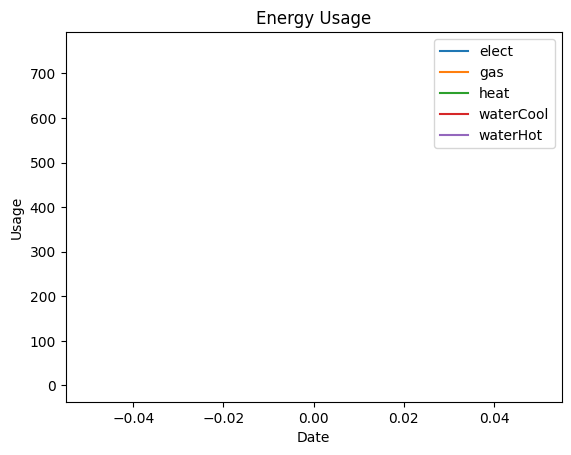

In [28]:
import matplotlib.pyplot as plt

# 숫자형 데이터를 포함하는 열 선택
numeric_columns = [col for col in df.columns if col != 'kaptCode' and df[col].dtype != 'object']

# 시각화 설정
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 표시할 데이터 선택
plot_data = df[numeric_columns]

# 선 그래프 생성
plot_data.plot()

# 그래프 제목과 축 레이블 설정
plt.title('Energy Usage')  # 그래프 제목
plt.xlabel('Date')  # x축 레이블
plt.ylabel('Usage')  # y축 레이블

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()


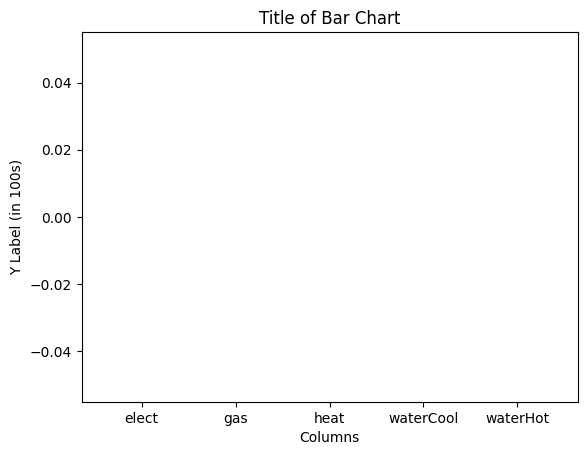

In [34]:
import matplotlib.pyplot as plt

# 그래프 생성을 위한 데이터 설정
x = ['elect', 'gas', 'heat', 'waterCool', 'waterHot']  # X축 데이터
y = [num * 100 for num in range(len(df))]  # Y축 데이터 (단순한 100단위의 숫자를 생성)

# 막대 그래프 생성
plt.bar(x, y)

# 그래프 제목과 축 레이블 설정
plt.title('Title of Bar Chart')
plt.xlabel('Columns')
plt.ylabel('Y Label (in 100s)')

# 그래프 출력
plt.show()
